# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [42]:
import pandas as pd
import pylab as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Your code here.
student_data= pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10],
                           'Age': [17,51,27,21,36,48,19,26,54,30],
                           'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [44]:
x = student_data['Age']
y = student_data['Tardies']

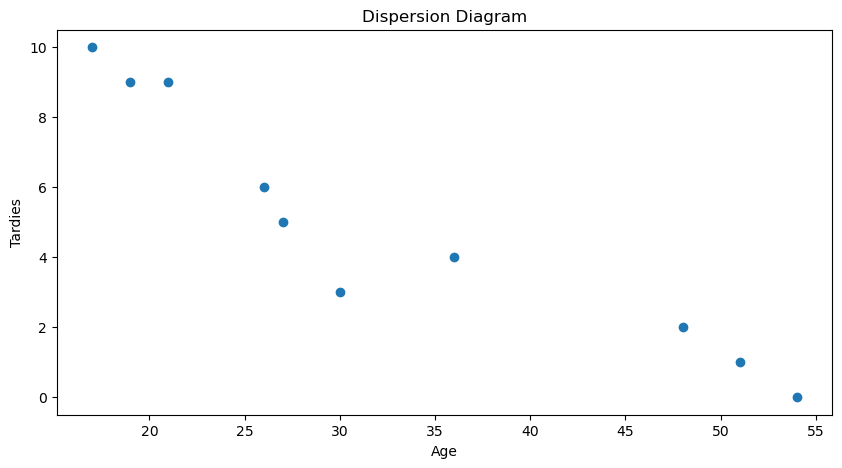

In [45]:
# Your code here.
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Dispersion Diagram')
plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*Viendo el gráfico de dispersión parece que hay una relación entre 'age' y el 'number of tardies'. A medida, que la edad disminuye,el número de tardanzas tiende aumentar. La hipótesis se podría interpretar como 'Cuanto más jóven es un estudiante, tiende a haber más faltas'.*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [46]:
#Covarianza:
covariance= student_data['Age'].cov(student_data['Tardies'])

In [47]:
#Correlación:
correlation = student_data['Age'].corr(student_data['Tardies'])

In [48]:
covariance, correlation

(-45.56666666666666, -0.9391626886887122)

*El valor negativo (-45.57) sugiere una relación negativa, es decir, que a medida que la variable 'Age' aumente, la otra variable 'Tardies' tiende a disminuir, y vicversa. Por otro lado, el coeficiente de correlación (-0.94), es un valor cercano a -1, lo que indica una fuerte relación negativa.*

*En conclusión,estos valores, respaldan la interpretación realizada anteriormente: los estudiantes más jóvenes tienden a tener más faltas y los estudiantes más mayores tienden a tener menos faltas.*

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [63]:
x= sm.add_constant(student_data.Age)

y = student_data.Tardies


modelo = sm.OLS(y, x).fit()

In [65]:
y_pred = modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        15:43:38   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

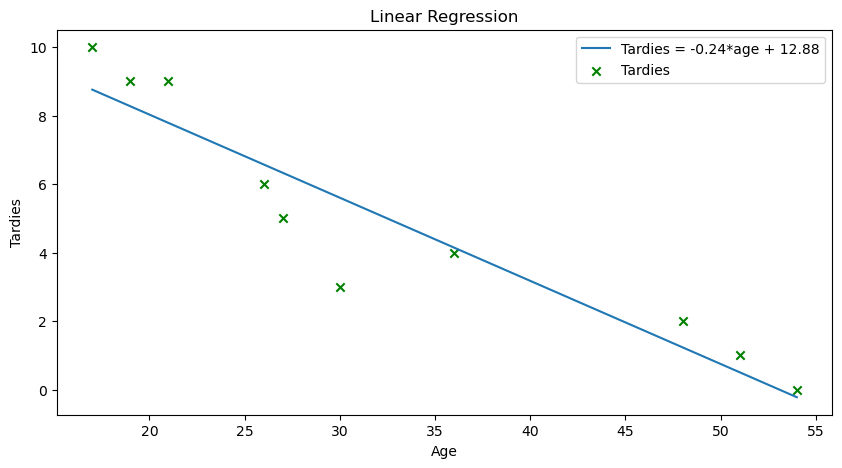

In [78]:
x=np.linspace(student_data.Age.min(), student_data.Age.max(), 50)

y=-0.2428*x + 12.8888  # y = mx + b

plt.figure(figsize=(10, 5))

# la recta
plt.plot(x, y, label='Tardies = -0.24*age + 12.88')


# datos
plt.scatter(student_data.Age, student_data.Tardies, marker='x', c='g', label='Tardies')


plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*El modelo parece ser razonablemente bueno para explicar la variabilidad en el número de tardanzas basándose en la edad. La edad tiene un impacto significativo en la predicción del número de tardanzas, y el modelo global es estadísticamente significativo.*

*-R-squared: El 88.2% de la variabilidad en el número de tardanzas (Tardies) puede ser explicada por la variable de edad (Age) en el modelo. Esto sugiere que el modelo tiene un buen ajuste para los datos.*

*-F-statistic: El estadístico F de 59.81 y su probabilidad asociada (Prob (F-statistic)) de 5.57e-05 indican que el modelo es estadísticamente significativo. Esto sugiere que al menos una variable independiente afecta significativamente la variable dependiente.*

*-Coeficientes: const -> El valor estimado del número de tardanzas cuando la edad es cero es 12.8888. En este contexto, este valor puede no tener un significado práctico, ya que la edad no puede ser realmente cero. (Age): El coeficiente de -0.2428 sugiere que, en promedio, el número de tardanzas disminuye en 0.2428 unidades por cada unidad adicional de edad.*

*-Estadísticos t y valores p: El estadístico t para la variable de edad es -7.734, y su valor p es 0.000. Esto sugiere que la variable de edad es estadísticamente significativa para predecir el número de tardanzas.*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [88]:
# Import any libraries you may need & the data
data = pd.read_csv('vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [89]:
# Your response here.
columns_select= data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
corr= columns_select.corr()
corr

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000


*Observando la tabla de correlación considero que las columnas potencialmente útiles para determinar las emisiones de CO2 son 'Year', 'Cylinders' y 'Fuel Barrels/Year'. 'Year' podría indicar cambios a lo largo del tiempo. ' Cylinders' esta fuertemente relacionado con la cantidad de combustible utilizado (0.739) y 'Fuel/ Cost/Year' esta inversamente relacionado con el rendimiento de combustible.*

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [93]:
# Your response here. 

x= sm.add_constant(data[['Year', 
                        'Cylinders', 
                        'Fuel Barrels/Year', 
                        'Combined MPG',
                        'Fuel Cost/Year']])

y = data[['CO2 Emission Grams/Mile']]


modelo = sm.OLS(y, x).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [94]:
# Your response here. 
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             17:39:52   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*-Calidad del Modelo: El modelo explica aproximadamente el 98.1% de la variabilidad en las emisiones de CO2 (R-squared).*

*-Todas las variables predictoras (Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year) son estadísticamente significativas para predecir las emisiones de CO2.*

*-Las variables predictoras tienen coeficientes significativos con interpretaciones intuitivas: A medida que 'Year' aumenta, las emisiones de CO2 disminuyen. Más cilindros ('Cylinders') y más barriles de combustible por año ('Fuel Barrels/Year') aumentan las emisiones. Un mayor rendimiento de combustible ('Combined MPG') y costos anuales de combustible ('Fuel Cost/Year') están asociados con menores emisiones.*

*-Precision: Los intervalos de confianza son estrechos, lo que indica una alta precisión en las estimaciones.*

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 